# Synthetic colors and composites

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from spectres import spectres
import scipy.integrate as spi
from astropy.io import fits


For at gemme figurer: plt.savefig('Plot_w_everything', dpi = 300)

# Paqssurvey data

In [3]:
#Kilde til data:
# GAIA: https://www.cosmos.esa.int/web/gaia/data-release-3
# ATLAS: https://astro.dur.ac.uk/Cosmology/vstatlas/
# VIKING: http://casu.ast.cam.ac.uk/vistasp/viking
# WISE: https://wise2.ipac.caltech.edu/docs/release/allwise/

# Den sydlige galaktiske pol: https://astronomy.swin.edu.au/cosmos/s/South+Galactic+Pole

data = np.loadtxt('PAQSsurveyphotometry.dat', skiprows=1)
ID = data[:,0]              #Rektascension fra GAIA kataloget
RA = data[:,1]              #Rektascension fra GAIA kataloget
Dec = data[:,2]             #Deklination fra GAIA kataloget

u_ATLAS = data[:,3]          # u-filter størrelsesklasse (ATLAS)
err_u_ATLAS = data[:,4]        # usikkerhed på u-filter størrelsesklasse (ATLAS)
g_ATLAS = data[:,5]          # g-filter størrelsesklasse (ATLAS)
err_g_ATLAS = data[:,6]        # usikkerhed på g-filter størrelsesklasse (ATLAS)
r_ATLAS = data[:,7]          # r-filter størrelsesklasse (ATLAS)
err_r_ATLAS = data[:,8]       # usikkerhed på r-filter størrelsesklasse (ATLAS)
i_ATLAS = data[:,9]         # i-filter størrelsesklasse (ATLAS)
err_i_ATLAS = data[:,10]       # usikkerhed på i-filter størrelsesklasse (ATLAS)
z_ATLAS = data[:,11]         # z-filter størrelsesklasse (ATLAS)
err_z_ATLAS = data[:,12]       # usikkerhed på z-filter størrelsesklasse (ATLAS)
g_DES = data[:,13]
err_g_DES = data[:,14]
r_DES = data[:,15]
err_r_DES = data[:,16]
i_DES = data[:,17]
err_i_DES = data[:,18]
z_DES = data[:,19]
err_z_DES = data[:,20]
y_DES = data[:,21]
err_y_DES = data[:,22]
y_VHS = data[:,23]
err_y_VHS = data[:,24]
j_VHS = data[:,25]
err_j_VHS = data[:,26]
h_VHS = data[:,27]
err_h_VHS = data[:,28]
ks_VHS = data[:,29]
err_ks_VHS = data[:,30]
Zmag = data[:,31]         # Z-filter størrelsesklasse (VIKING)
e_Zmag = data[:,32]       # usikkerhed på Z-filter størrelsesklasse (VIKING)
Ymag = data[:,33]         # Y-filter størrelsesklasse (VIKING)
e_Ymag = data[:,34]       # usikkerhed på Y-filter størrelsesklasse (VIKING)
Jmag = data[:,35]         # J-filter størrelsesklasse (VIKING)
e_Jmag = data[:,36]       # usikkerhed på J-filter størrelsesklasse (VIKING)
Hmag = data[:,37]         # H-filter størrelsesklasse (VIKING)
e_Hmag = data[:,38]       # usikkerhed på H-filter størrelsesklasse (VIKING)
Ksmag = data[:,39]        # Ks-filter størrelsesklasse (VIKING)
e_Ksmag = data[:,40]      # usikkerhed på Ks-filter størrelsesklasse (VIKING)
W1mag = data[:,41]        # W1-filter størrelsesklasse (WISE)
e_W1mag = data[:,42]      # usikkerhed på W1-filter størrelsesklasse (WISE)
W2mag = data[:,43]        # W2-filter størrelsesklasse (WISE)
e_W2mag = data[:,44]      # usikkerhed på W1-filter størrelsesklasse (WISE)
W3mag = data[:,45]        # W3-filter størrelsesklasse (WISE)
e_W3mag = data[:,46]      # usikkerhed på W1-filter størrelsesklasse (WISE)
W4mag = data[:,47]        # W4-filter størrelsesklasse (WISE)
e_W4mag = data[:,48]      # usikkerhed på W1-filter størrelsesklasse (WISE)

#Information of filtre og AB-offsets
lambphot = [3540., 4750., 6220., 7630., 9050., 4750., 6220., 7630., 9050., 10310., 10310., 12480., 16310., 22010., 9050., 10310., 12480., 16310., 22010., 34000., 46000., 120000., 220000.]
aboffsets = np.asarray([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
#aboffsets = np.asarray([0., 0., 0., 0., 0., 0.634, 0.91, 1.39, 1.85, 2.67, 3.31, 5.14, 6.61])

#Lav farve-farve plottet
errlim = 0.1
good = np.where((err_g_ATLAS < errlim) & (err_r_ATLAS < errlim) & (err_j_VHS < errlim) & (err_ks_VHS < errlim))


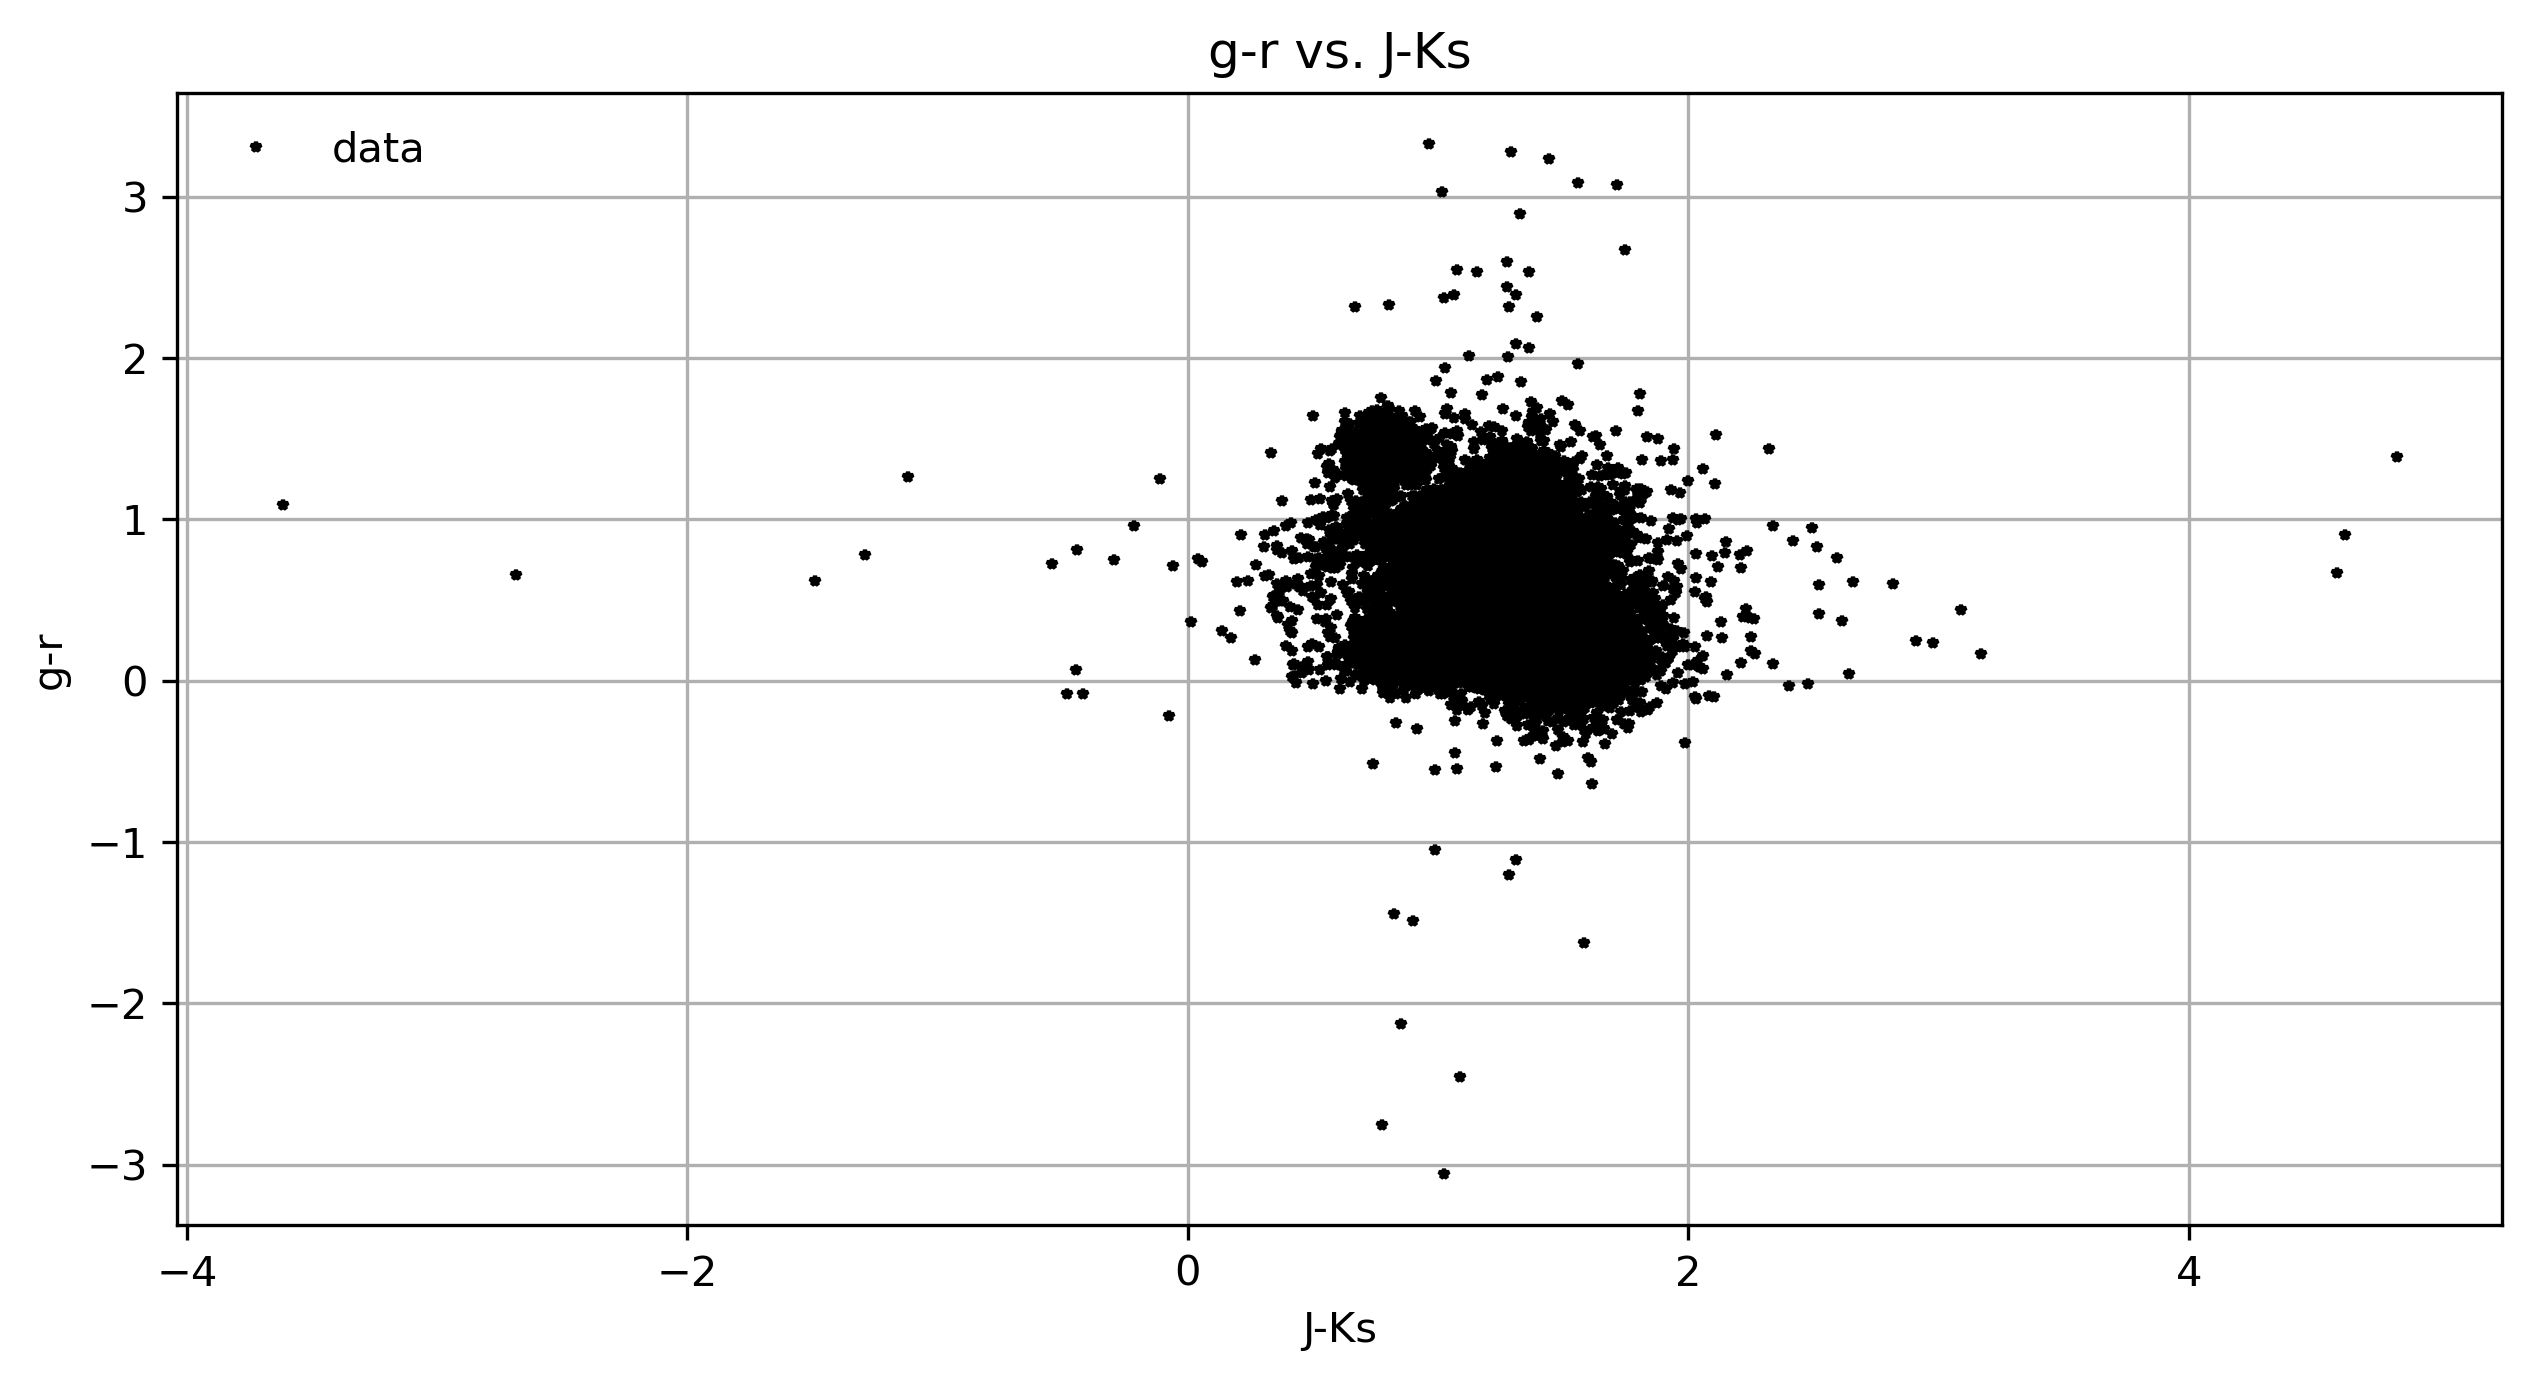

In [25]:
plt.figure(figsize=(10, 5), dpi=300)
plt.grid()
plt.plot(j_VHS[good]-ks_VHS[good],g_ATLAS[good]-r_ATLAS[good],color='black',linestyle='', marker='*', markersize=2.5,label='data')

plt.xlabel('J-Ks')
plt.ylabel('g-r')
plt.legend(loc='upper left', prop={'size': 10}, frameon=False)

plt.title('g-r vs. J-Ks')
plt.show()


# Composite

In [5]:
def LYMAN_BLANKET(lambd, z):
    #Based on Madau https://articles.adsabs.harvard.edu/pdf/1995ApJ...441...18M
    import numpy as np
    nl = 8
    p = 3.46
    npts = len(lambd)
    y = np.zeros((npts, nl), dtype=float)
    lyman = 1. - 1/(np.arange(nl) + 2)**2
    a = np.array([-0.00360, -0.00170, -0.00120, -0.00093,
                  -0.00090, -0.00087, -0.00085, -0.00080])

    c = 0.
    for i in range(nl):
        c += a[i] * ((1+z) * lyman[i])**p
    c = np.exp(c)

    lyman = 911.753 / lyman

    for i in range(nl):
        y[:, i] = a[i] * (lambd / lyman[i])**p * (lambd <= (1+z) * lyman[i])
    y = np.exp(nl * np.sum(y, axis=1) / npts)

    q = np.where(lambd <= (1+z) * lyman[nl-1])
    if len(q[0]) > 0:
        y[q] = c * np.exp(-0.0015 * z * ((1+z) * lyman[nl-1] - lambd[q]))

    return y



In [6]:


#Read transmission curves for g, r, J, Ks
tab = np.loadtxt('SDSS_g.data')
wave_g = tab[:,0]
transm_g = tab[:,1]

tab = np.loadtxt('SDSS_r.data')
wave_r = tab[:,0]
transm_r = tab[:,1]

tab = np.loadtxt('J_UKIRT.dat')
wave_J = 10.*tab[:,0]
transm_J = tab[:,1]/100.
wave_J = wave_J[::-1]
transm_J = transm_J[::-1]

tab = np.loadtxt('K_UKIRT.dat')
wave_Ks = 10.*tab[:,0]
transm_Ks = tab[:,1]/100.
wave_Ks = wave_Ks[::-1]
transm_Ks = transm_Ks[::-1]

#Filter characteristics from Hewett table 7
lamdacen_g = 4670.
lambdacen_r = 6156.
lambdacen_J = 1248.
lambdacen_Ks = 2201.
ABoff_g = -0.103
ABoff_r = 0.146
ABoff_J = 0.938
ABoff_Ks = 1.900

#SMC extinction parameters
ai = np.array([185.,27.,0.005,0.010,0.012,0.030])
wli = np.array([0.042,0.08,0.22,9.7,18.,25.])
bi = np.array([90.,5.50,-1.95,-1.95,-1.80,0.0])
ni = np.array([2.0,4.0,2.0,2.0,2.0,2.0])
Ki = np.array([2.89,0.91,0.02,1.55,1.72,1.89])

#Read quasar template
tab = np.loadtxt('compoM.data')
wave_qso = tab[:,0]
spec_qso = tab[:,1]



In [7]:
#Read LRD spectra
z = 3.438
#from 1.1 to 1.6
HDU = fits.open('LRD/ceers-ddt-v2_prism-clear_2750_1034.spec.fits')
print(HDU.info())
hdr = HDU[1].header
spec1d = HDU[1].data
wave_lrd1 = spec1d.wave*10000./(1+z)
spec_lrd1 = spec1d.flux/(wave_lrd1/10000.)**2
z = 5.05
#from 1.9 to 2.5
HDU = fits.open('LRD/jades-gdn-v2_prism-clear_1181_68797.spec.fits')
print(HDU.info())
hdr = HDU[1].header
spec1d = HDU[1].data
wave_lrd2 = spec1d.wave*10000./(1+z)
spec_lrd2 = spec1d.flux/(wave_lrd2/10000.)**2
z=4.53
#from 1.7 to 2.3
HDU = fits.open('LRD/macsj0647-v2_prism-clear_1433_1045.spec.fits')
print(HDU.info())
hdr = HDU[1].header
spec1d = HDU[1].data
wave_lrd3 = spec1d.wave*10000./(1+z)
spec_lrd3 = spec1d.flux/(wave_lrd3/10000.)**2

Filename: LRD/ceers-ddt-v2_prism-clear_2750_1034.spec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SPEC1D        1 BinTableHDU    289   435R x 3C   [D, D, D]   
  2  SCI           1 ImageHDU       279   (435, 31)   float64   
  3  WHT           1 ImageHDU       279   (435, 31)   float64   
  4  PROFILE       1 ImageHDU       279   (435, 31)   float64   
  5  PROF1D        1 BinTableHDU     25   31R x 3C   [D, D, D]   
None
Filename: LRD/jades-gdn-v2_prism-clear_1181_68797.spec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SPEC1D        1 BinTableHDU    304   435R x 4C   [D, D, D, D]   
  2  SCI           1 ImageHDU       291   (435, 31)   float64   
  3  WHT           1 ImageHDU       291   (435, 31)   float64   
  4  PROFILE       1 ImageHDU       291   (435, 31)   float64   
  5  PROF1D        1 BinTableHDU     25   31R x 3C   [D, 

In [8]:

#Read galaxy templates
tab = np.loadtxt('JaffetGaltemplates/lrt_templates.dat')
wave_jaffet = tab[:,0]*10000.
spec_E = tab[:,3]/wave_jaffet**2
spec_Sbc = tab[:,4]/wave_jaffet**2
spec_I = tab[:,5]/wave_jaffet**2

#Rebin to quasar wavelength grid
spec_I_rebin = spectres(wave_qso,wave_jaffet,spec_I)
spec_Sbc_rebin = spectres(wave_qso,wave_jaffet,spec_Sbc)
spec_E_rebin = spectres(wave_qso,wave_jaffet,spec_E)
spec_gal_rebin = spec_I_rebin

In [9]:

#LRD1:
#Spec_I
#1/9 weight to gal/qso
#Avqso = 0.0
#Avgal = 0.
#normalise at 5250-5600 Å
#select LRD
AVqso = 0.0
AVgal = 0.0
wave_lrd = wave_lrd1
spec_lrd = spec_lrd1
#Redden the qso template
ABqso = AVqso*4.1/3.1
Alambda = spec_qso*0.
wlr = wave_qso/1.e4
for e in range(len(ai)):
    Alambda=Alambda+ai[e]/((wlr/wli[e])**ni[e]+(wli[e]/wlr)**ni[e]+bi[e])
Alambda = Alambda*ABqso
model = 10**(-0.4*Alambda)*spec_qso
#Redden the gal template
ABgal = AVgal*4.1/3.1
Alambda = spec_qso*0.
wlr = wave_qso/1.e4
for e in range(len(ai)):
    Alambda=Alambda+ai[e]/((wlr/wli[e])**ni[e]+(wli[e]/wlr)**ni[e]+bi[e])
Alambda = Alambda*ABgal
spec_gal_rebin = 10**(-0.4*Alambda)*spec_gal_rebin
#Normalise
specfilt = np.nonzero((wave_lrd > 5250) & (wave_lrd < 5600))
normspec = np.mean(spec_lrd[specfilt])
modelfilt = np.nonzero((wave_qso > 5250) & (wave_qso < 5600))
normqso = np.mean(model[modelfilt])
normgal = np.mean(spec_gal_rebin[modelfilt])
factorqso = normspec/normqso
factorgal = normspec/normgal
model_lrd1 = (9.*model*factorqso+1.*spec_gal_rebin*factorgal)/10.

#LRD2:
#Spec_I
#1/3 weight to gal/qso
#Avqso = 4.5
#Avgal = 0.
#normalise at 5250-5600 Å
#select LRD
AVqso = 4.5
AVgal = 0.0
wave_lrd = wave_lrd2
spec_lrd = spec_lrd2
#Redden the qso template
ABqso = AVqso*4.1/3.1
Alambda = spec_qso*0.
wlr = wave_qso/1.e4
for e in range(len(ai)):
    Alambda=Alambda+ai[e]/((wlr/wli[e])**ni[e]+(wli[e]/wlr)**ni[e]+bi[e])
Alambda = Alambda*ABqso
model = 10**(-0.4*Alambda)*spec_qso
#Redden the gal template
ABgal = AVgal*4.1/3.1
Alambda = spec_qso*0.
wlr = wave_qso/1.e4
for e in range(len(ai)):
    Alambda=Alambda+ai[e]/((wlr/wli[e])**ni[e]+(wli[e]/wlr)**ni[e]+bi[e])
Alambda = Alambda*ABgal
spec_gal_rebin = 10**(-0.4*Alambda)*spec_gal_rebin
#Normalise
specfilt = np.nonzero((wave_lrd > 5250) & (wave_lrd < 5600))
normspec = np.mean(spec_lrd[specfilt])
modelfilt = np.nonzero((wave_qso > 5250) & (wave_qso < 5600))
normqso = np.mean(model[modelfilt])
normgal = np.mean(spec_gal_rebin[modelfilt])
factorqso = normspec/normqso
factorgal = normspec/normgal
model_lrd2 = (3.*model*factorqso+1.*spec_gal_rebin*factorgal)/4.

#LRD3:
#Spec_I
#4/1 weight to gal/qso
#Avqso = 8.0
#Avgal = -0.2
#normalise at 5250-5600 Å
#select LRD
AVqso = 8.0
AVgal = -0.2
wave_lrd = wave_lrd3
spec_lrd = spec_lrd3
#Redden the qso template
ABqso = AVqso*4.1/3.1
Alambda = spec_qso*0.
wlr = wave_qso/1.e4
for e in range(len(ai)):
    Alambda=Alambda+ai[e]/((wlr/wli[e])**ni[e]+(wli[e]/wlr)**ni[e]+bi[e])
Alambda = Alambda*ABqso
model = 10**(-0.4*Alambda)*spec_qso
#Redden the gal template
ABgal = AVgal*4.1/3.1
Alambda = spec_qso*0.
wlr = wave_qso/1.e4
for e in range(len(ai)):
    Alambda=Alambda+ai[e]/((wlr/wli[e])**ni[e]+(wli[e]/wlr)**ni[e]+bi[e])
Alambda = Alambda*ABgal
spec_gal_rebin = 10**(-0.4*Alambda)*spec_gal_rebin
#Normalise
specfilt = np.nonzero((wave_lrd > 5250) & (wave_lrd < 5600))
normspec = np.mean(spec_lrd[specfilt])
modelfilt = np.nonzero((wave_qso > 5250) & (wave_qso < 5600))
normqso = np.mean(model[modelfilt])
normgal = np.mean(spec_gal_rebin[modelfilt])
factorqso = normspec/normqso
factorgal = normspec/normgal
model_lrd3 = (1.*model*factorqso+4.*spec_gal_rebin*factorgal)/5.


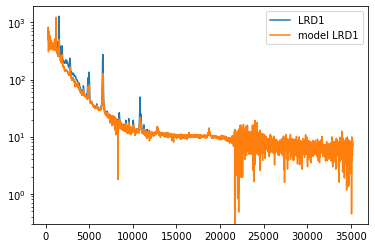

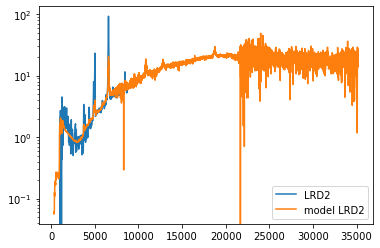

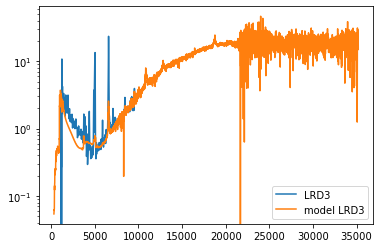

In [10]:

#Make plots
plt.figure()
plt.plot(wave_lrd1,spec_lrd1,zorder=1,label='LRD1')
plt.plot(wave_qso,model_lrd1,zorder=1,label='model LRD1')
plt.yscale('log')
plt.legend()
plt.show()

plt.figure()
plt.plot(wave_lrd2,spec_lrd2,zorder=1,label='LRD2')
plt.plot(wave_qso,model_lrd2,zorder=1,label='model LRD2')
plt.yscale('log')
plt.legend()
plt.show()

plt.figure()
plt.plot(wave_lrd3,spec_lrd3,zorder=1,label='LRD3')
plt.plot(wave_qso,model_lrd3,zorder=1,label='model LRD3')
plt.yscale('log')
plt.legend()
plt.show()

In [11]:
#Read spectrum of vega
tab = np.loadtxt('vega.dat')
wave_vega = tab[:,0]
spec_vega = tab[:,1]*1.e17

#Integrate the fluxes of vega in the four filters
spec_vega_resample_g =  spectres(wave_g,wave_vega,spec_vega*wave_vega)
gvega = spi.simps(spec_vega_resample_g*transm_g, wave_g)/spi.simps(transm_g*wave_g, wave_g)
spec_vega_resample_r =  spectres(wave_r,wave_vega,spec_vega*wave_vega)
rvega = spi.simps(spec_vega_resample_r*transm_r, wave_r)/spi.simps(transm_r*wave_r, wave_r)
spec_vega_resample_J =  spectres(wave_J,wave_vega,spec_vega*wave_vega)
Jvega = spi.simps(spec_vega_resample_J*transm_J, wave_J)/spi.simps(transm_J*wave_J, wave_J)
spec_vega_resample_Ks =  spectres(wave_Ks,wave_vega,spec_vega*wave_vega)
Ksvega = spi.simps(spec_vega_resample_Ks*transm_Ks, wave_Ks)/spi.simps(transm_Ks*wave_Ks, wave_Ks)


In [12]:

#For each z in the interval from 0 to 6 calculate the g-r and J-Ks colours 
gr_modellrd1 = np.empty(60, dtype=float)
JKs_modellrd1 = np.empty(60, dtype=float)
for nz in range(0,60):
    z = float(nz)/10.+0.0
    wave_qso_z = wave_qso*(1.+z)
    spec_qso = model_lrd1*LYMAN_BLANKET(wave_qso_z,z)
    spec_qso_resample_g =  spectres(wave_g,wave_qso_z,spec_qso*wave_qso_z)
    spec_qso_resample_r =  spectres(wave_r,wave_qso_z,spec_qso*wave_qso_z)
    spec_qso_resample_J =  spectres(wave_J,wave_qso_z,spec_qso*wave_qso_z)
    spec_qso_resample_Ks =  spectres(wave_Ks,wave_qso_z,spec_qso*wave_qso_z)
    gflam = spi.simps(spec_qso_resample_g*transm_g, wave_g)/spi.simps(transm_g*wave_g, wave_g)
    rflam = spi.simps(spec_qso_resample_r*transm_r, wave_r)/spi.simps(transm_r*wave_r, wave_r)
    Jflam = spi.simps(spec_qso_resample_J*transm_J, wave_J)/spi.simps(transm_J*wave_J, wave_J)
    Ksflam = spi.simps(spec_qso_resample_Ks*transm_Ks, wave_Ks)/spi.simps(transm_Ks*wave_Ks, wave_Ks)
    gr_modellrd1[nz] = -2.5*np.log10(gflam/rflam*rvega/gvega)+ABoff_g-ABoff_r
    JKs_modellrd1[nz] = -2.5*np.log10(Jflam/Ksflam*Ksvega/Jvega)

gr_modellrd2 = np.empty(60, dtype=float)
JKs_modellrd2 = np.empty(60, dtype=float)
for nz in range(0,60):
    z = float(nz)/10.+0.0
    wave_qso_z = wave_qso*(1.+z)
    spec_qso = model_lrd2*LYMAN_BLANKET(wave_qso_z,z)
    spec_qso_resample_g =  spectres(wave_g,wave_qso_z,spec_qso*wave_qso_z)
    spec_qso_resample_r =  spectres(wave_r,wave_qso_z,spec_qso*wave_qso_z)
    spec_qso_resample_J =  spectres(wave_J,wave_qso_z,spec_qso*wave_qso_z)
    spec_qso_resample_Ks =  spectres(wave_Ks,wave_qso_z,spec_qso*wave_qso_z)
    gflam = spi.simps(spec_qso_resample_g*transm_g, wave_g)/spi.simps(transm_g*wave_g, wave_g)
    rflam = spi.simps(spec_qso_resample_r*transm_r, wave_r)/spi.simps(transm_r*wave_r, wave_r)
    Jflam = spi.simps(spec_qso_resample_J*transm_J, wave_J)/spi.simps(transm_J*wave_J, wave_J)
    Ksflam = spi.simps(spec_qso_resample_Ks*transm_Ks, wave_Ks)/spi.simps(transm_Ks*wave_Ks, wave_Ks)
    gr_modellrd2[nz] = -2.5*np.log10(gflam/rflam*rvega/gvega)+ABoff_g-ABoff_r
    JKs_modellrd2[nz] = -2.5*np.log10(Jflam/Ksflam*Ksvega/Jvega)

gr_modellrd3 = np.empty(60, dtype=float)
JKs_modellrd3 = np.empty(60, dtype=float)
for nz in range(0,60):
    z = float(nz)/10.+0.0
    wave_qso_z = wave_qso*(1.+z)
    spec_qso = model_lrd3*LYMAN_BLANKET(wave_qso_z,z)
    spec_qso_resample_g =  spectres(wave_g,wave_qso_z,spec_qso*wave_qso_z)
    spec_qso_resample_r =  spectres(wave_r,wave_qso_z,spec_qso*wave_qso_z)
    spec_qso_resample_J =  spectres(wave_J,wave_qso_z,spec_qso*wave_qso_z)
    spec_qso_resample_Ks =  spectres(wave_Ks,wave_qso_z,spec_qso*wave_qso_z)
    gflam = spi.simps(spec_qso_resample_g*transm_g, wave_g)/spi.simps(transm_g*wave_g, wave_g)
    rflam = spi.simps(spec_qso_resample_r*transm_r, wave_r)/spi.simps(transm_r*wave_r, wave_r)
    Jflam = spi.simps(spec_qso_resample_J*transm_J, wave_J)/spi.simps(transm_J*wave_J, wave_J)
    Ksflam = spi.simps(spec_qso_resample_Ks*transm_Ks, wave_Ks)/spi.simps(transm_Ks*wave_Ks, wave_Ks)
    gr_modellrd3[nz] = -2.5*np.log10(gflam/rflam*rvega/gvega)+ABoff_g-ABoff_r
    JKs_modellrd3[nz] = -2.5*np.log10(Jflam/Ksflam*Ksvega/Jvega)


#For each z in the interval from 1.1 to 1.6 calculate the g-r and J-Ks colours for the LRD
gr_lrd1 = np.empty(76, dtype=float)
JKs_lrd1 = np.empty(76, dtype=float)
for nz in range(0,76):
    z = float(nz)/100.+1.16
    wave_lrd_z = wave_lrd1*(1.+z)
    spec_lrd = spec_lrd1*LYMAN_BLANKET(wave_lrd_z,z)
    spec_lrd_resample_g =  spectres(wave_g,wave_lrd_z,spec_lrd*wave_lrd_z)
    spec_lrd_resample_r =  spectres(wave_r,wave_lrd_z,spec_lrd*wave_lrd_z)
    spec_lrd_resample_J =  spectres(wave_J,wave_lrd_z,spec_lrd*wave_lrd_z)
    spec_lrd_resample_Ks =  spectres(wave_Ks,wave_lrd_z,spec_lrd*wave_lrd_z)
    gflam = spi.simps(spec_lrd_resample_g*transm_g, wave_g)/spi.simps(transm_g*wave_g, wave_g)
    rflam = spi.simps(spec_lrd_resample_r*transm_r, wave_r)/spi.simps(transm_r*wave_r, wave_r)
    Jflam = spi.simps(spec_lrd_resample_J*transm_J, wave_J)/spi.simps(transm_J*wave_J, wave_J)
    Ksflam = spi.simps(spec_lrd_resample_Ks*transm_Ks, wave_Ks)/spi.simps(transm_Ks*wave_Ks, wave_Ks)
    gr_lrd1[nz] = -2.5*np.log10(gflam/rflam*rvega/gvega)+ABoff_g-ABoff_r
    JKs_lrd1[nz] = -2.5*np.log10(Jflam/Ksflam*Ksvega/Jvega)

gr_lrd2 = np.empty(65, dtype=float)
JKs_lrd2 = np.empty(65, dtype=float)
for nz in range(0,65):
    z = float(nz)/100.+2.1
    wave_lrd_z = wave_lrd2*(1.+z)
    spec_lrd = spec_lrd2*LYMAN_BLANKET(wave_lrd_z,z)
    spec_lrd_resample_g =  spectres(wave_g,wave_lrd_z,spec_lrd*wave_lrd_z)
    spec_lrd_resample_r =  spectres(wave_r,wave_lrd_z,spec_lrd*wave_lrd_z)
    spec_lrd_resample_J =  spectres(wave_J,wave_lrd_z,spec_lrd*wave_lrd_z)
    spec_lrd_resample_Ks =  spectres(wave_Ks,wave_lrd_z,spec_lrd*wave_lrd_z)
    gflam = spi.simps(spec_lrd_resample_g*transm_g, wave_g)/spi.simps(transm_g*wave_g, wave_g)
    rflam = spi.simps(spec_lrd_resample_r*transm_r, wave_r)/spi.simps(transm_r*wave_r, wave_r)
    Jflam = spi.simps(spec_lrd_resample_J*transm_J, wave_J)/spi.simps(transm_J*wave_J, wave_J)
    Ksflam = spi.simps(spec_lrd_resample_Ks*transm_Ks, wave_Ks)/spi.simps(transm_Ks*wave_Ks, wave_Ks)
    gr_lrd2[nz] = -2.5*np.log10(gflam/rflam*rvega/gvega)+ABoff_g-ABoff_r
    JKs_lrd2[nz] = -2.5*np.log10(Jflam/Ksflam*Ksvega/Jvega)

gr_lrd3 = np.empty(65, dtype=float)
JKs_lrd3 = np.empty(65, dtype=float)
for nz in range(0,65):
    z = float(nz)/100.+1.7
    wave_lrd_z = wave_lrd3*(1.+z)
    spec_lrd = spec_lrd3*LYMAN_BLANKET(wave_lrd_z,z)
    spec_lrd_resample_g =  spectres(wave_g,wave_lrd_z,spec_lrd*wave_lrd_z)
    spec_lrd_resample_r =  spectres(wave_r,wave_lrd_z,spec_lrd*wave_lrd_z)
    spec_lrd_resample_J =  spectres(wave_J,wave_lrd_z,spec_lrd*wave_lrd_z)
    spec_lrd_resample_Ks =  spectres(wave_Ks,wave_lrd_z,spec_lrd*wave_lrd_z)
    gflam = spi.simps(spec_lrd_resample_g*transm_g, wave_g)/spi.simps(transm_g*wave_g, wave_g)
    rflam = spi.simps(spec_lrd_resample_r*transm_r, wave_r)/spi.simps(transm_r*wave_r, wave_r)
    Jflam = spi.simps(spec_lrd_resample_J*transm_J, wave_J)/spi.simps(transm_J*wave_J, wave_J)
    Ksflam = spi.simps(spec_lrd_resample_Ks*transm_Ks, wave_Ks)/spi.simps(transm_Ks*wave_Ks, wave_Ks)
    gr_lrd3[nz] = -2.5*np.log10(gflam/rflam*rvega/gvega)+ABoff_g-ABoff_r
    JKs_lrd3[nz] = -2.5*np.log10(Jflam/Ksflam*Ksvega/Jvega)



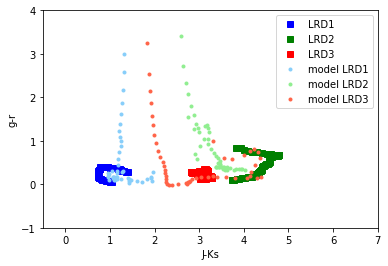

In [13]:
#Make plot
plt.figure()
plt.plot(JKs_lrd1, gr_lrd1, 's',color='b', label='LRD1')
plt.plot(JKs_lrd2, gr_lrd2, 's',color='g', label='LRD2')
plt.plot(JKs_lrd3, gr_lrd3, 's',color='r', label='LRD3')
plt.plot(JKs_modellrd1, gr_modellrd1, '.',color='lightskyblue', label='model LRD1')
plt.plot(JKs_modellrd2, gr_modellrd2, '.',color='lightgreen', label='model LRD2')
plt.plot(JKs_modellrd3, gr_modellrd3, '.',color='tomato', label='model LRD3')
plt.xlabel('J-Ks')
plt.ylabel('g-r')
plt.xlim(-0.5,7)
plt.ylim(-1,4)
plt.legend()
plt.show()


# Hewett data

In [14]:

#Read Hewett et al. 
tab = np.loadtxt('Hewett/367-2-454_Supplementary_Data/table8.dat')
gr_8 = tab[:,1]
JK_8 = tab[:,7]+tab[:,8]
tab = np.loadtxt('Hewett/367-2-454_Supplementary_Data/table16.dat')
gr_16 = tab[:,2]
JK_16 = tab[:,8]+tab[:,9]
tab = np.loadtxt('Hewett/367-2-454_Supplementary_Data/table17.dat')
gr_17 = tab[:,2]
JK_17 = tab[:,8]+tab[:,9]
tab = np.loadtxt('Hewett/367-2-454_Supplementary_Data/table18.dat')
gr_18 = tab[:,2]
JK_18 = tab[:,8]+tab[:,9]
tab = np.loadtxt('Hewett/367-2-454_Supplementary_Data/table19.dat')
gr_19 = tab[:,2]
JK_19 = tab[:,8]+tab[:,9]
tab = np.loadtxt('Hewett/367-2-454_Supplementary_Data/table20.dat')
z_20 = tab[:,0]
gr_20 = tab[:,2]
JK_20 = tab[:,8]+tab[:,9]
tab = np.loadtxt('Hewett/367-2-454_Supplementary_Data/table21.dat')
gr_21 = tab[:,2]
JK_21 = tab[:,8]+tab[:,9]
tab = np.loadtxt('Hewett/367-2-454_Supplementary_Data/table22.dat')
gr_22 = tab[:,2]
JK_22 = tab[:,8]+tab[:,9]
tab = np.loadtxt('Hewett/367-2-454_Supplementary_Data/table23.dat')
gr_23 = tab[:,2]
JK_23 = tab[:,8]+tab[:,9]
tab = np.loadtxt('Hewett/367-2-454_Supplementary_Data/table24.dat')
gr_24 = tab[:,2]
JK_24 = tab[:,8]+tab[:,9]
tab = np.loadtxt('Hewett/367-2-454_Supplementary_Data/table25.dat')
gr_25 = tab[:,2]
JK_25 = tab[:,8]+tab[:,9]
tab = np.loadtxt('Hewett/367-2-454_Supplementary_Data/table26.dat')
gr_26 = tab[:,2]
JK_26 = tab[:,8]+tab[:,9]
tab = np.loadtxt('Hewett/367-2-454_Supplementary_Data/table27.dat')
gr_27 = tab[:,2]
JK_27 = tab[:,8]+tab[:,9]

# Parentcat data

In [15]:
tab = np.genfromtxt('parentcat.csv', skip_header=1, delimiter=',', dtype=None, encoding=None)

name = [nested_arr[1] for nested_arr in tab]

g = [nested_arr[9] for nested_arr in tab]
g_array = np.array(g)
gerr = np.array([nested_arr[10] for nested_arr in tab])

r = [nested_arr[11] for nested_arr in tab]
r_array = np.array(r) 
rerr = np.array([nested_arr[12] for nested_arr in tab])

J = [nested_arr[19] for nested_arr in tab]
J_array = np.array(J) 
Jerr = np.array([nested_arr[20] for nested_arr in tab])

K = [nested_arr[23] for nested_arr in tab]
K_array = np.array(K) 
Kerr = np.array([nested_arr[24] for nested_arr in tab])

errlim = 0.1
good2 = np.where((rerr < errlim) & (gerr < errlim) & (Jerr < errlim) & (Kerr < errlim))

gr_known = g_array[good2] - r_array[good2]
JK_known = J_array[good2] - K_array[good2]


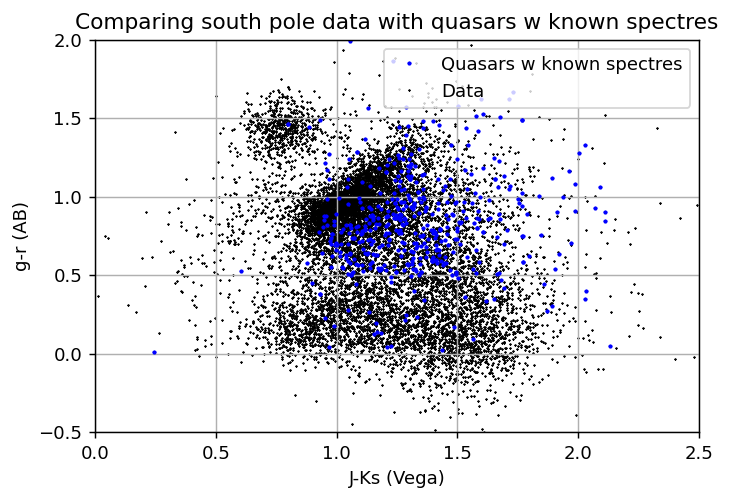

In [16]:
#Make plot 
plt.figure(dpi=130)
plt.grid()

plt.plot(JK_known,gr_known,color='b',label='Quasars w known spectres', marker='*',linestyle='', markersize=2)
plt.plot(j_VHS[good]-ks_VHS[good],g_ATLAS[good]-r_ATLAS[good],color='black',linestyle='', marker='*', markersize=0.7, label='Data', zorder=1)

plt.title('Comparing south pole data with quasars w known spectres')

plt.xlim(0,2.5)
plt.ylim(-0.5,2)

plt.xlabel('J-Ks (Vega)')
plt.ylabel('g-r (AB)')
plt.legend()
plt.show()

# Plotting together

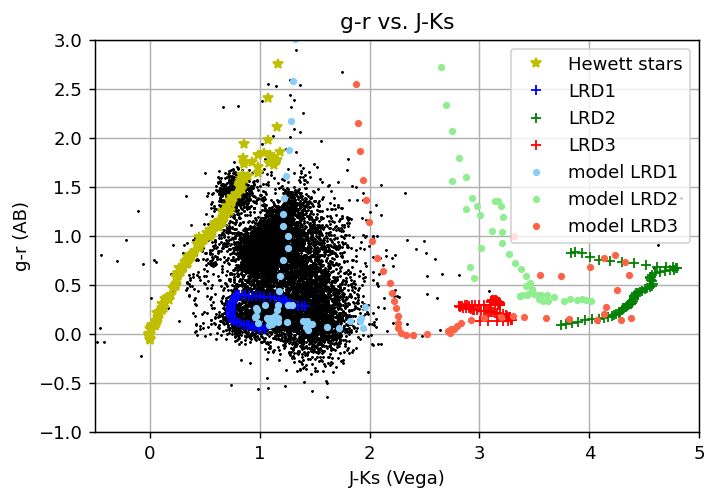

In [17]:
plt.figure(dpi=130)
plt.grid()
plt.plot(j_VHS[good]-ks_VHS[good],g_ATLAS[good]-r_ATLAS[good],color='black',linestyle='', marker='*', markersize=1)
plt.plot(JK_8, gr_8, '*',color='y', label='Hewett stars')
plt.plot(JKs_lrd1, gr_lrd1, '+',color='b', label='LRD1')
plt.plot(JKs_lrd2, gr_lrd2, '+',color='g', label='LRD2')
plt.plot(JKs_lrd3, gr_lrd3, '+',color='r', label='LRD3')
plt.plot(JKs_modellrd1, gr_modellrd1, '.',color='lightskyblue', label='model LRD1')
plt.plot(JKs_modellrd2, gr_modellrd2, '.',color='lightgreen', label='model LRD2')
plt.plot(JKs_modellrd3, gr_modellrd3, '.',color='tomato', label='model LRD3')
plt.xlabel('J-Ks (Vega)')
plt.ylabel('g-r (AB)')
plt.xlim(-0.5,5)
plt.ylim(-1,3)
plt.legend()
plt.title('g-r vs. J-Ks')
plt.show()


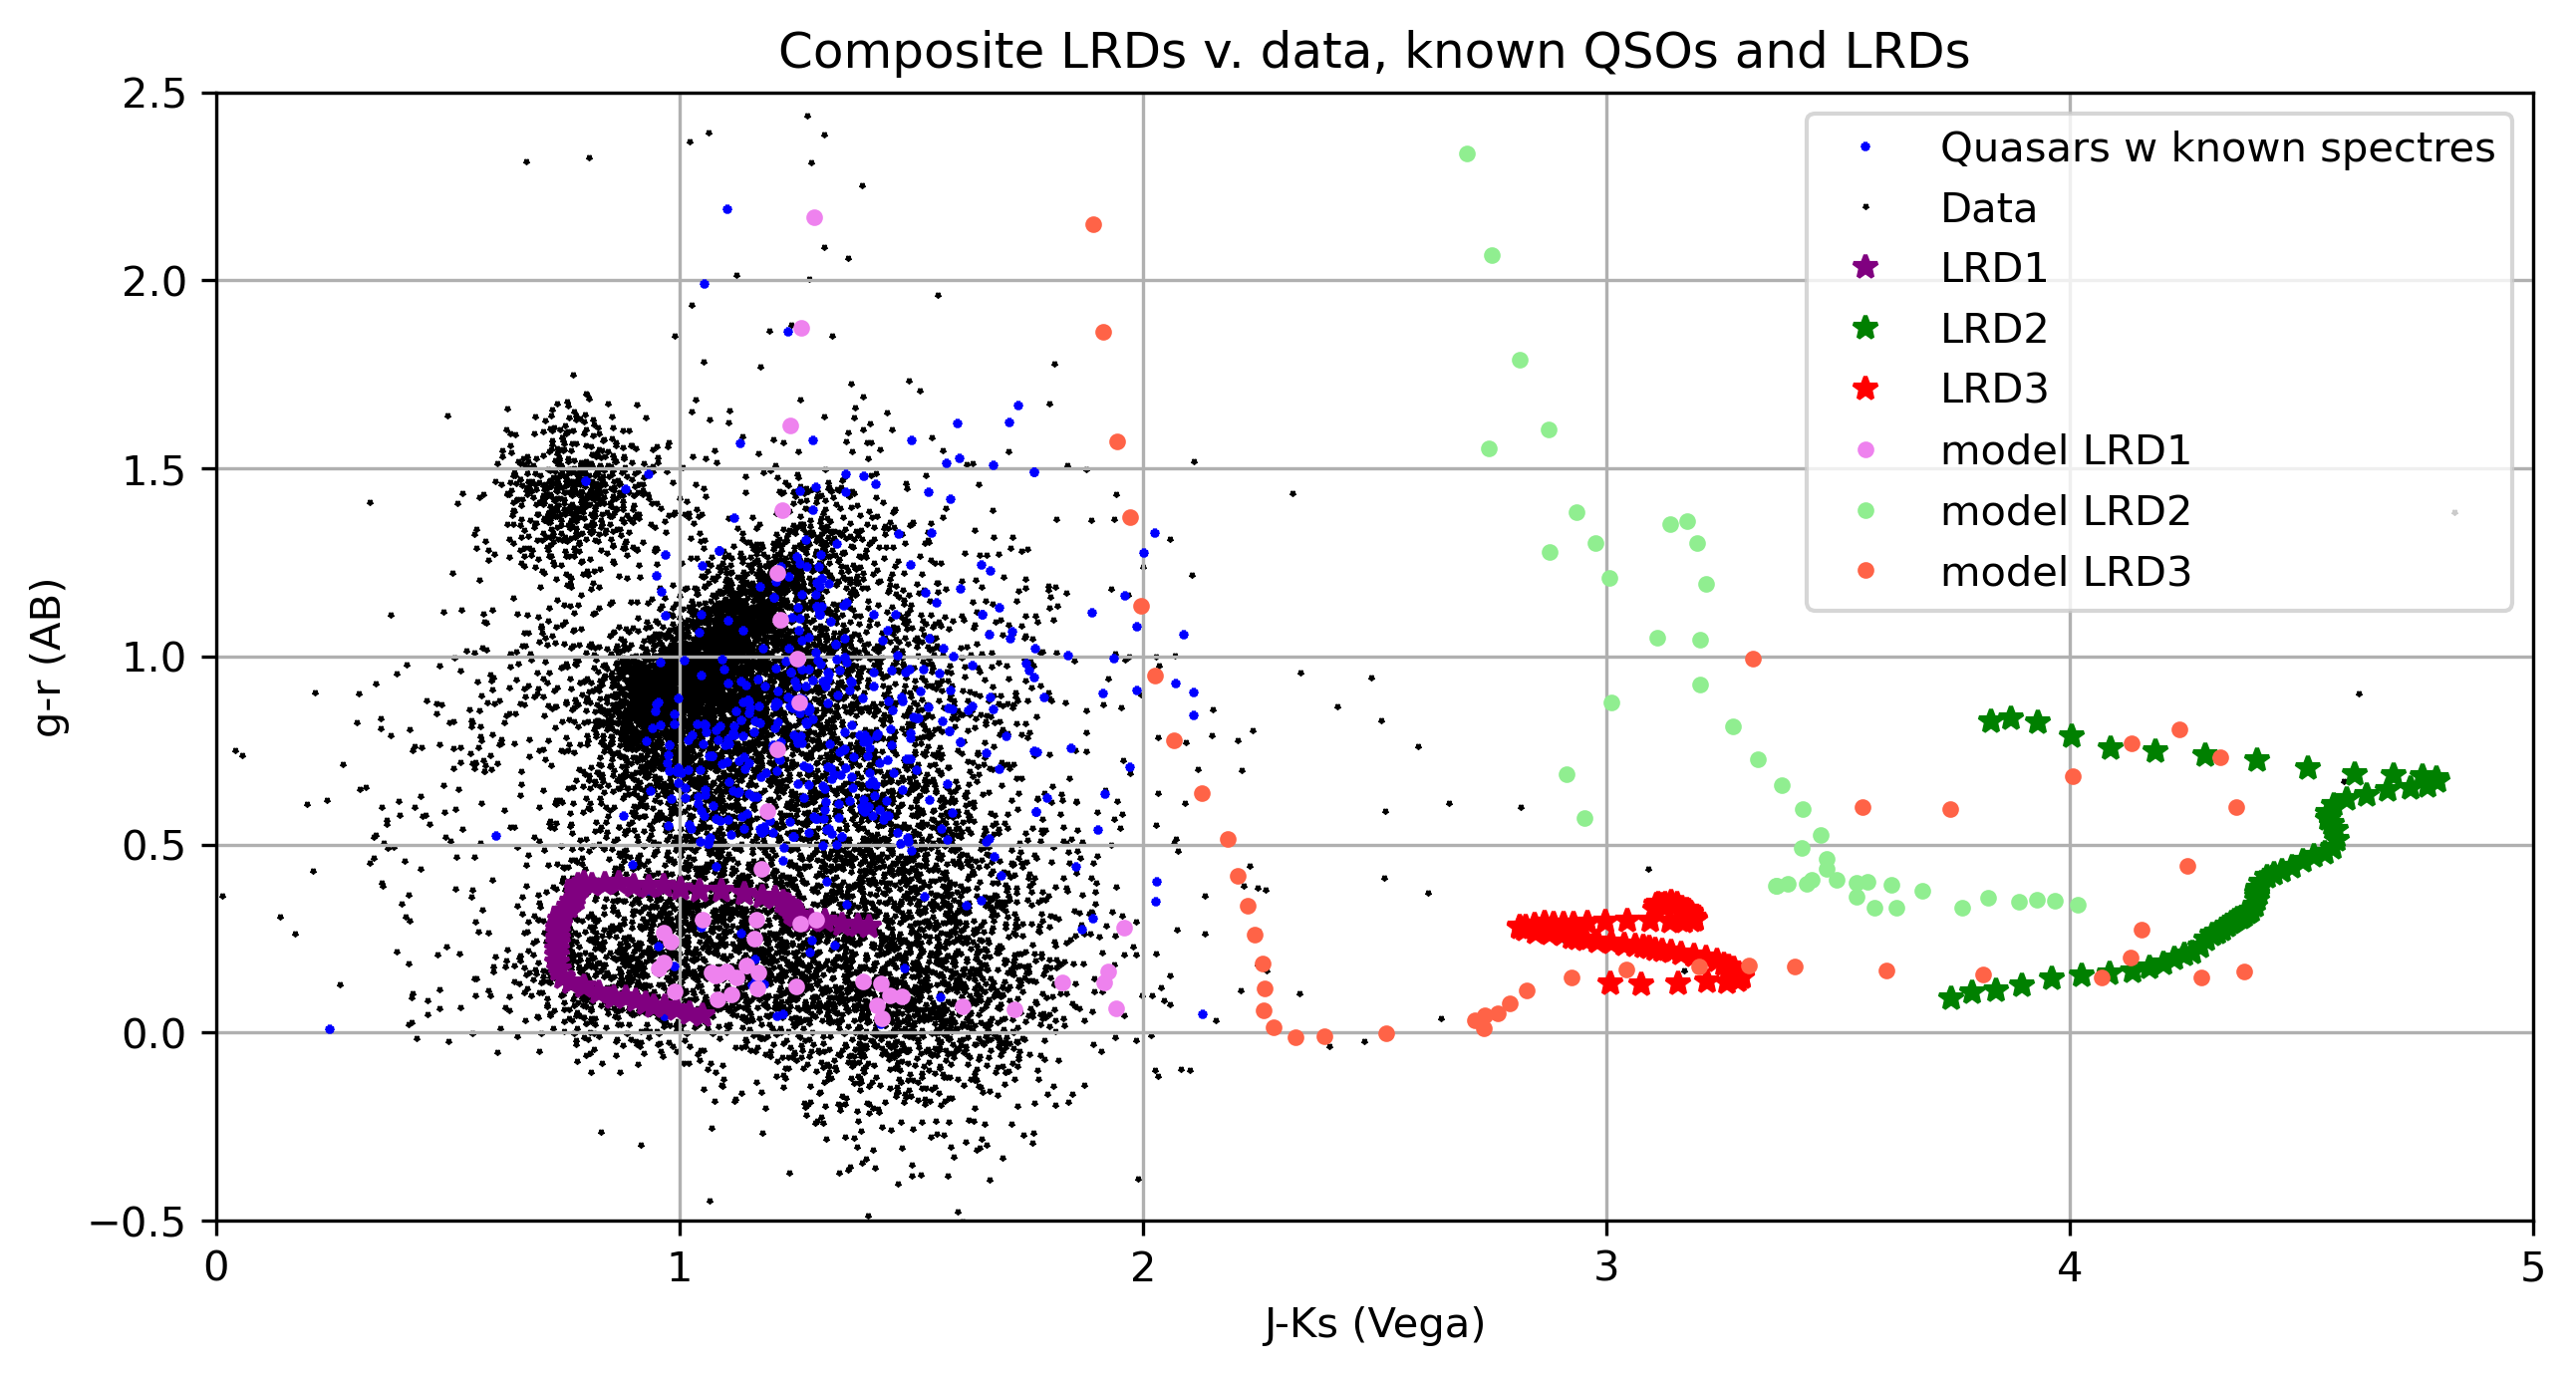

<Figure size 432x288 with 0 Axes>

In [89]:
plt.figure(figsize=(10, 5), dpi=300)
plt.grid()

plt.plot(JK_known,gr_known,color='b',label='Quasars w known spectres', marker='*',linestyle='', markersize=2,zorder=2)
plt.plot(j_VHS[good]-ks_VHS[good],g_ATLAS[good]-r_ATLAS[good],color='black',linestyle='', marker='*', markersize=1, label='Data', zorder=1)


plt.plot(JKs_lrd1, gr_lrd1, '*',color='purple', label='LRD1')
plt.plot(JKs_lrd2, gr_lrd2, '*',color='g', label='LRD2')
plt.plot(JKs_lrd3, gr_lrd3, '*',color='r', label='LRD3')
plt.plot(JKs_modellrd1, gr_modellrd1, '.',color='violet', label='model LRD1')
plt.plot(JKs_modellrd2, gr_modellrd2, '.',color='lightgreen', label='model LRD2')
plt.plot(JKs_modellrd3, gr_modellrd3, '.',color='tomato', label='model LRD3')


plt.xlim(0,5)
plt.ylim(-0.5,2.5)
plt.title('Composite LRDs v. data, known QSOs and LRDs')
plt.xlabel('J-Ks (Vega)')
plt.ylabel('g-r (AB)')
plt.legend()
plt.show()

plt.savefig('Plot_w_everything', dpi = 300)

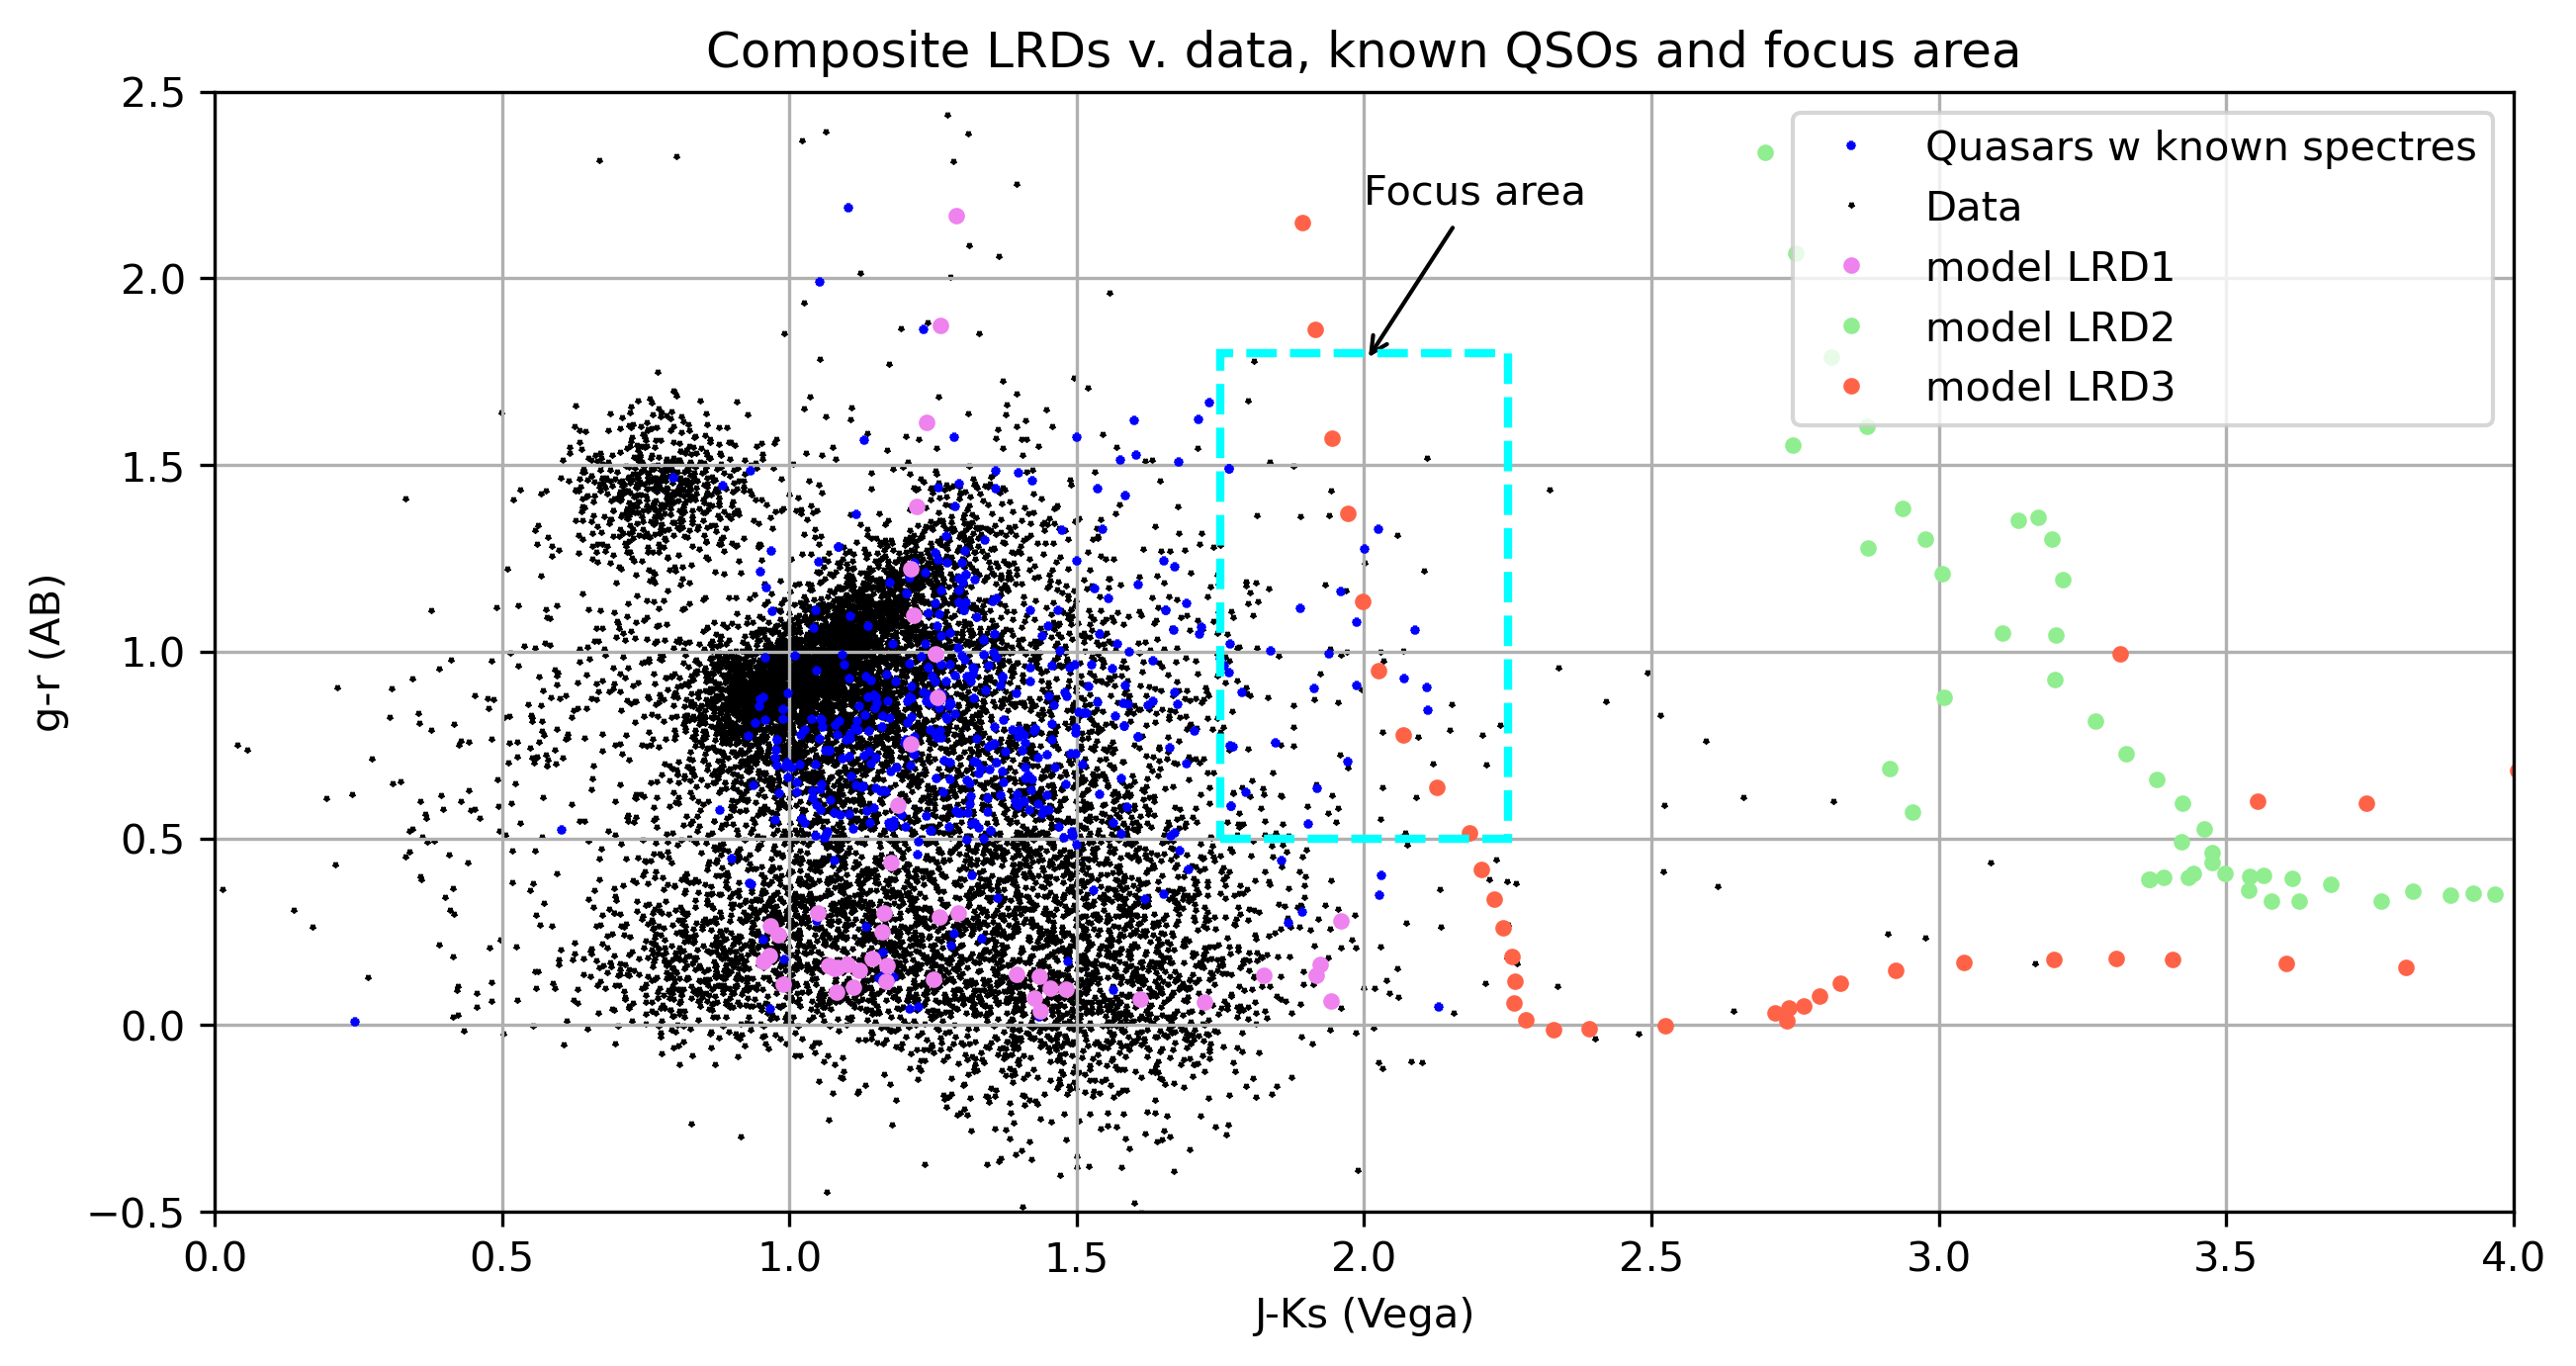

<Figure size 432x288 with 0 Axes>

In [90]:
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

plt.figure(figsize=(10, 5), dpi=300)
plt.grid()

plt.plot(JK_known,gr_known,color='b',label='Quasars w known spectres', marker='*',linestyle='', markersize=2,zorder=2)
plt.plot(j_VHS[good]-ks_VHS[good],g_ATLAS[good]-r_ATLAS[good],color='black',linestyle='', marker='*', markersize=1, label='Data', zorder=1)



plt.plot(JKs_modellrd1, gr_modellrd1, '.',color='violet', label='model LRD1')
plt.plot(JKs_modellrd2, gr_modellrd2, '.',color='lightgreen', label='model LRD2')
plt.plot(JKs_modellrd3, gr_modellrd3, '.',color='tomato', label='model LRD3')

square = Rectangle((1.75, 0.5), 0.5, 1.3, fill=False, color='cyan', linewidth=2, linestyle= '--',zorder=5)
plt.gca().add_patch(square)

plt.annotate('Focus area', xy=(2, 1.77), xytext=(2, 2.2),
             arrowprops=dict(arrowstyle='->'))


plt.xlim(0,4)
plt.ylim(-0.5,2.5)
plt.title('Composite LRDs v. data, known QSOs and focus area')
plt.xlabel('J-Ks (Vega)')
plt.ylabel('g-r (AB)')
plt.legend()
plt.show()

plt.savefig('Focus_area', dpi = 300)

In [ ]:
# Assuming x and y are arrays containing the coordinates of blue points and red points
# Here, x_black and y_black are arrays containing the x and y coordinates of black points
# Similarly, x_red and y_red are arrays containing the x and y coordinates of red points

# Calculate distances between each black point and each red point
distances = np.sqrt((JK_known[:, np.newaxis] - JKs_lrd)**2 + (gr_known[:, np.newaxis] - gr_lrd)**2)

# Find indices of the two blue points with the smallest distances to red points
closest_blue_indices = np.unravel_index(np.argsort(distances, axis=None)[:10], distances.shape)

# Get the coordinates of the two closest black points
closest_blue_points = [(JK_known[i], gr_known[i]) for i in closest_blue_indices[0]]
closest_blue_names = [name[i] for i in closest_blue_indices[0]]

print("Coordinates of the two closest blue points:", closest_blue_points)